In [35]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrix
from sklearn.metrics import mean_squared_error
from pyearth import Earth
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict, cross_validate
from sklearn.linear_model import LinearRegression, LogisticRegression

#sklearn module for scaling data
from sklearn.preprocessing import StandardScaler

#sklearn modules for computing the performance metrics
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, \
roc_curve, auc, precision_score, recall_score, confusion_matrix


from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, StratifiedKFold
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier, BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier,AdaBoostRegressor,AdaBoostClassifier

from sklearn.neighbors import KNeighborsRegressor
import itertools as it
import time as time

In [36]:
#Reading data
X_train = pd.read_csv("X_train.csv")
X_train = X_train.set_index("Unnamed: 0")
X_train.head()

,belongs_to_collection,budget,homepage,runtime,tagline,release_month,genres_Action,genres_Comedy,genres_Documentary,genres_Drama,genres_Horror,production_countries_IN,production_countries_US,spoken_languages_en
Unnamed: 0,,,,,,,,,,,,,,
11211,0,0.0,0,98.0,0,1,0,0,0,1,0,0,1,1
23938,0,0.0,0,106.0,0,7,0,0,0,0,0,0,1,1
26729,0,0.0,0,81.0,1,10,0,0,0,0,0,0,0,1
8138,0,0.0,0,105.0,1,10,1,0,0,0,0,0,1,1
28023,0,0.0,0,110.0,1,3,0,0,0,0,0,0,0,0


In [37]:
y_train = pd.read_csv("y_train.csv")
y_train = y_train.set_index("Unnamed: 0")
y_train.head()

,profitable
Unnamed: 0,
11211,0
23938,1
26729,0
8138,0
28023,0


In [38]:
X_test = pd.read_csv("X_test.csv")
X_test = X_test.set_index("Unnamed: 0")
X_test.head()

,belongs_to_collection,budget,homepage,runtime,tagline,release_month,genres_Action,genres_Comedy,genres_Documentary,genres_Drama,genres_Horror,production_countries_IN,production_countries_US,spoken_languages_en
Unnamed: 0,,,,,,,,,,,,,,
46392,0,0.0,0,88.0,0,10,0,1,0,0,0,0,0,0
9341,0,0.0,0,145.0,0,7,0,0,0,1,0,0,0,0
474,0,0.0,0,110.0,1,10,1,0,0,0,0,0,0,1
45192,1,0.0,0,20.0,0,1,0,0,0,0,0,0,0,0
33605,0,0.0,0,89.0,1,11,1,0,0,0,0,0,0,0


In [39]:
y_test = pd.read_csv("y_test.csv")
y_test = y_test.set_index("Unnamed: 0")
y_test.head()

,profitable
Unnamed: 0,
46392,0
9341,1
474,1
45192,0
33605,1


In [40]:
#Proportion of 0s and 1s in the train data
y_train.value_counts()

profitable
1             5008
0             4994
dtype: int64

In [41]:
#Proportion of 0s and 1s in the test data
y_test.value_counts()

profitable
0             890
1             876
dtype: int64

In [42]:
X_train.homepage.value_counts()

0    7634
1    2368
Name: homepage, dtype: int64

## Number of trees vs cross validation accuracy

>10 0.766 (0.010)
>50 0.777 (0.009)
>100 0.782 (0.011)
>500 0.779 (0.011)
>1000 0.775 (0.011)
>5000 0.756 (0.017)


Text(0.5, 0, 'Number of trees')

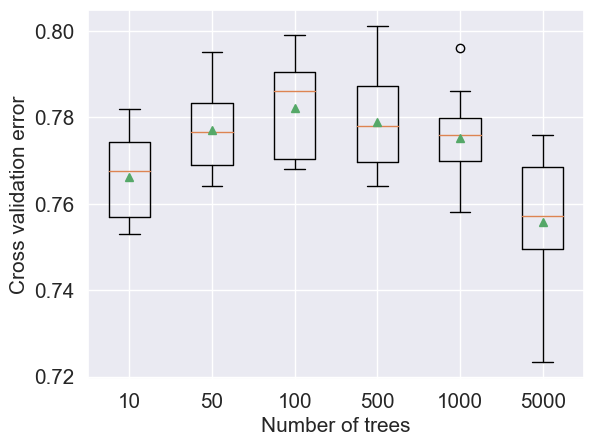

In [45]:
import warnings
warnings.filterwarnings('ignore')

def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000, 5000]
    for n in n_trees:
        models[str(n)] = GradientBoostingClassifier(n_estimators=n,random_state=1)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X_train, y_train.values.ravel(), scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train.values.ravel())
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Number of trees',fontsize=15)

## Depth of each tree vs cross validation accuracy

>1 0.773 (0.009)
>2 0.779 (0.010)
>3 0.782 (0.011)
>4 0.782 (0.010)
>5 0.780 (0.011)
>6 0.778 (0.012)
>7 0.772 (0.013)
>8 0.765 (0.012)
>9 0.760 (0.012)
>10 0.754 (0.010)
>11 0.749 (0.013)
>12 0.747 (0.010)
>13 0.743 (0.011)
>14 0.744 (0.009)
>15 0.738 (0.012)
>16 0.737 (0.011)
>17 0.730 (0.011)
>18 0.728 (0.014)
>19 0.719 (0.015)
>20 0.713 (0.010)


Text(0.5, 0, 'Depth of each tree')

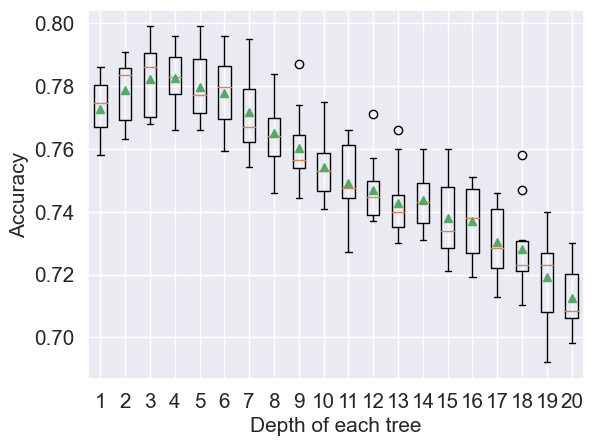

In [46]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore depths from 1 to 10
    for i in range(1,21):
        # define ensemble model
        models[str(i)] = GradientBoostingClassifier(random_state=1,max_depth=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X_train, y_train.values.ravel(), scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train.values.ravel())
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Accuracy',fontsize=15)
plt.xlabel('Depth of each tree',fontsize=15)

## Learning rate vs cross validation accuracy

>0.1 0.781 (0.016)
>0.2 0.779 (0.015)
>0.3 0.780 (0.015)
>0.4 0.778 (0.017)
>0.5 0.774 (0.017)
>0.6 0.772 (0.012)
>0.7 0.769 (0.020)
>0.8 0.770 (0.017)
>0.9 0.766 (0.017)
>1.0 0.768 (0.017)
>1.1 0.762 (0.019)
>1.2 0.760 (0.017)
>1.3 0.764 (0.018)
>1.4 0.757 (0.020)
>1.5 0.755 (0.018)
>1.6 0.752 (0.018)
>1.7 0.753 (0.019)
>1.8 0.565 (0.120)
>1.9 0.538 (0.147)
>2.0 0.526 (0.140)


Text(0.5, 0, 'Learning rate')

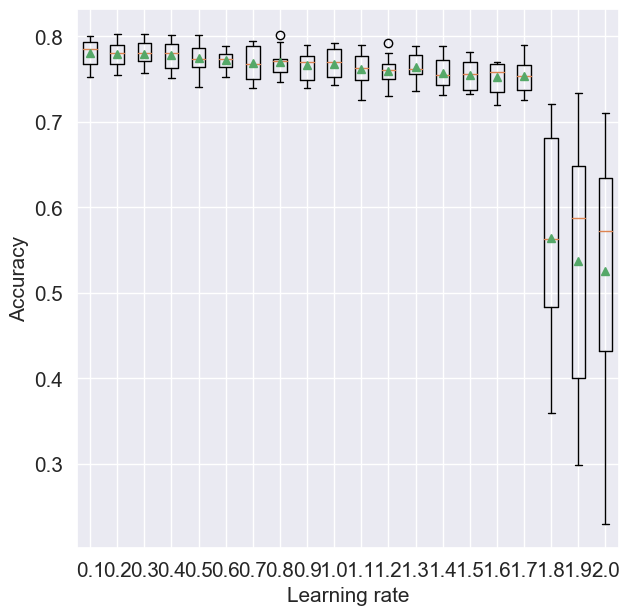

In [47]:
def get_models():
    models = dict()
    # explore learning rates from 0.1 to 2 in 0.1 increments
    for i in np.arange(0.1, 2.1, 0.1):
        key = '%.1f' % i
        models[key] = GradientBoostingClassifier(learning_rate=i,random_state=1)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X_train, y_train.values.ravel(), scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train.values.ravel())
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.figure(figsize=(7, 7))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Accuracy',fontsize=15)
plt.xlabel('Learning rate',fontsize=15)

## Tuning Gradient boosting Classifier

In [56]:
start_time = time.time()
model = GradientBoostingClassifier(random_state=1)
grid = dict()
grid['n_estimators'] = [10, 50, 100, 200, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['max_depth'] = [1,2,3,4,5]
grid['subsample'] = [0.5,1.0]
# define the evaluation procedure
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, verbose = True, scoring = 'accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train.values.ravel())
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Time taken = ", time.time() - start_time, "seconds")

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
Best: 0.782943 using {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500, 'subsample': 1.0}
Time taken =  200.52118682861328 seconds


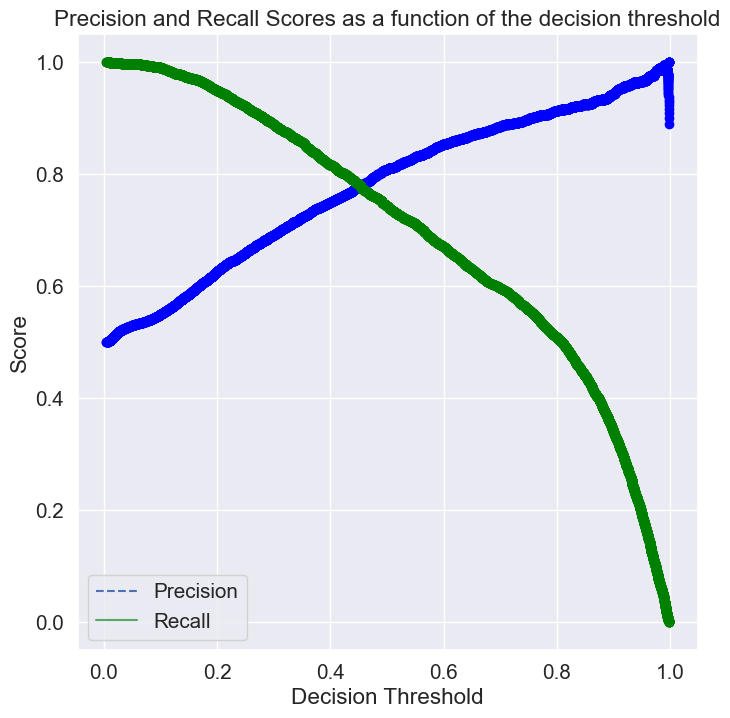

In [57]:
#Model based on the optimal parameters
model = GradientBoostingClassifier(random_state=1,max_depth=2,learning_rate=0.1,subsample=1,
                          n_estimators=500).fit(X_train, y_train.values.ravel())

# Note that we are using the cross-validated predicted probabilities, instead of directly using the 
# predicted probabilities on train data, as the model may be overfitting on the train data, and 
# may lead to misleading results
cross_val_ypred = cross_val_predict(model, X_train, y_train.values.ravel(), cv = 5, method = 'predict_proba')

p, r, thresholds = precision_recall_curve(y_train.values.ravel(), cross_val_ypred[:,1])
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.plot(thresholds, precisions[:-1], "o", color = 'blue')
    plt.plot(thresholds, recalls[:-1], "o", color = 'green')
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()
plot_precision_recall_vs_threshold(p, r, thresholds)

In [58]:
# Thresholds with precision and recall
all_thresholds = np.concatenate([thresholds.reshape(-1,1), p[:-1].reshape(-1,1), r[:-1].reshape(-1,1)], axis = 1)
recall_more_than_80 = all_thresholds[all_thresholds[:,2]>0.8,:]
# As the values in 'recall_more_than_80' are arranged in decreasing order of recall and increasing threshold,
# the last value will provide the maximum threshold probability for the recall to be more than 80%
# We wish to find the maximum threshold probability to obtain the maximum possible precision
recall_more_than_80[recall_more_than_80.shape[0]-1]

array([0.42572173, 0.7633835 , 0.80011981])

In [59]:
#Optimal decision threshold probability
thres = recall_more_than_80[recall_more_than_80.shape[0]-1][0]
thres

0.425721729088532

Accuracy:  77.519818799547
ROC-AUC:  0.8632881842901852
Precision:  0.7658157602663707
Recall:  0.7876712328767124


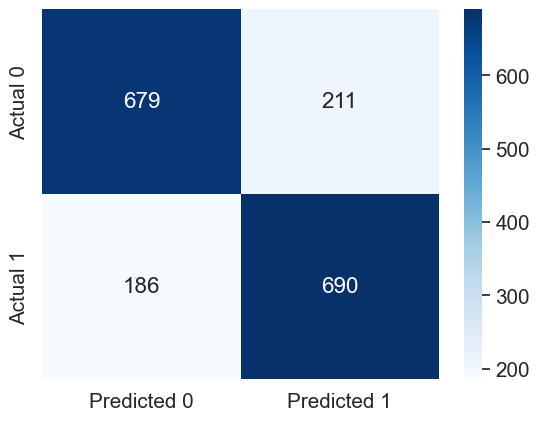

In [60]:
# Performance metrics computation for the optimum decision threshold probability
desired_threshold = thres

y_pred_prob = model.predict_proba(X_test)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_test)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');

Model having grid hyperparameter values 
{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500, 'subsample': 1.0}

model = GradientBoostingClassifier(random_state=1,max_depth=2,
            learning_rate=0.1,subsample=1,n_estimators=500).fit(X_train, y_train.values.ravel())
            
could be said to be the best model out of all combinations tested by cross_validation, that satisfies our requirements, which were maximizing the accuracy while maintaining a resonable level of recall. 